In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt
# 新增
import datetime
import os
import matplotlib.cm as cm #从内置colormap中取色

## matplotlib logo

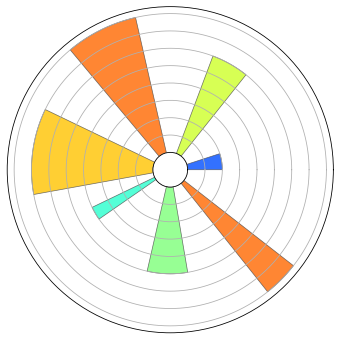

In [32]:
fig=plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1, projection='polar')

N=7
lw_bars=0.7
arc = 2*np.pi
theta = np.arange(0, arc, arc/N)
radii = np.array([2, 6, 8, 7, 4, 5, 8])
width = np.pi/4* np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
# print(theta, radii, width)
ax.set_xlim(0, np.pi*2)
ax.set_rorigin(-1)

bars=ax.bar(theta, radii, width, bottom=0, align='edge', edgecolor='0.3', lw=lw_bars, alpha=0.8)
for r, bar in zip(radii, bars):
    color=*cm.jet(r/10)[:3],0.6 
    bar.set_facecolor(color)
ax.xaxis.set_major_locator(MultipleLocator(45/180*np.pi))
ax.xaxis.set_ticks([])
ax.yaxis.set_ticklabels([])

plt.show()

## 案例1

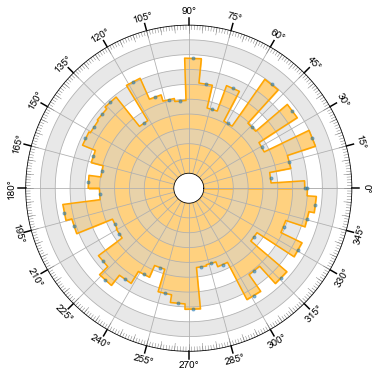

In [154]:
def reset_xticklabels(ax, strict=False):
    plt.gcf().canvas.draw()
    xlabels=ax.xaxis.get_ticklabels()
    xticks=ax.get_xticks()-ax.get_theta_offset()
    if(strict):
        xticks[xticks<0] = xticks[xticks<0]+2*np.pi
        xticks[xticks>2*np.pi] = xticks[xticks>2*np.pi] - 2*np.pi
    for label, tick in zip(xlabels, xticks):
        angle=np.rad2deg(tick)
        if((angle<0) or (angle>=360)):
           continue
        x,y=label.get_position()
        text=label.get_text()
        angle=angle - 90 if(angle<180) else angle -90 + 180
        ax.text(x,y,text,color=label.get_color(),va='center',ha='center',rotation=angle,fontsize=label.get_fontsize(), transform=label.get_transform())
    ax.xaxis.set_ticklabels([])

fig=plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1, projection='polar')

ax.set_thetalim(0, 2*np.pi)
ax.set_rlim(1, 999)
ax.set_rorigin(-100)

ax.xaxis.set_major_locator(MultipleLocator(np.deg2rad(15)))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_ticklabels([])
# 
reset_xticklabels(ax)

def xtick_gen(ax, locator_deg, thick=0.9, color='k', **kwargs):
    for tick in np.arange(ax.get_xlim()[0], ax.get_xlim()[1], np.deg2rad(locator_deg)):
        ax.plot([tick, tick],[ax.get_rmax(), ax.get_rmax()*thick], color=color,**kwargs)

xtick_gen(ax, 15, color='k', thick=1.05, clip_on=False)
xtick_gen(ax, 5, color='gray',linewidth=0.5, thick=0.95, clip_on=False)
xtick_gen(ax, 1, color='gray',linewidth=0.5, thick=0.97, clip_on=False)

# 
ax.bar(0, 100, bottom=200, width=2*np.pi, color='lightgray',alpha=0.5)
ax.bar(0, 100, bottom=400, width=2*np.pi, color='lightgray',alpha=0.5)
ax.bar(0, 100, bottom=600, width=2*np.pi, color='lightgray',alpha=0.5)
ax.bar(0, 100, bottom=800, width=2*np.pi, color='lightgray',alpha=0.5)

# 
y=np.random.rand(50)*400+400
x=np.linspace(0, 2*np.pi, len(y))
ax.scatter(x,y, zorder=5, alpha=0.5, marker='.')
ax.fill_between(x,y, step='mid', color='orange', alpha=0.5)
ax.step(x,y, where='mid', color='orange')

plt.show()

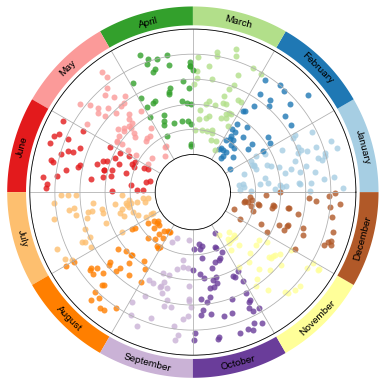

In [155]:
fig=plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1, projection='polar')

ymax=1000
ymin=0
yorigin=-300

ax.set_thetalim(0, 2*np.pi)
ax.set_rlim(ymin,ymax)
ax.set_rorigin(-300)

ax.xaxis.set_major_locator(MultipleLocator(np.deg2rad(30)))
# ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])

colors_month = plt.get_cmap('Paired')(np.linspace(0,1, 12))
x,y = np.random.rand(2,500)
x=np.array(2*np.pi*x,float)
y=np.array(y*(ymax-ymin-50)*0.9+50,float)

for month in range(1, 13):
    color=colors_month[month-1]
    month_str=datetime.date(1990, month, 1).strftime('%B')
    x_rad=np.deg2rad(month*30-15)
    br=ax.bar(x_rad, 150, bottom=ymax+30, width=np.deg2rad(30), clip_on=False, color=color)
    angle=np.rad2deg(x_rad)
    ax.text(x_rad, br[0].xy[1]+br[0].get_height()/2, month_str, 
           va='center',ha='center', rotation=angle-90 if(angle<180) else angle-90-180)
    ind=((x>=np.deg2rad(month*30-30)) & (x<np.deg2rad(month*30)))
    ax.scatter(x[ind],y[ind], facecolor=color, alpha=0.8, linewidth=0)
plt.show()

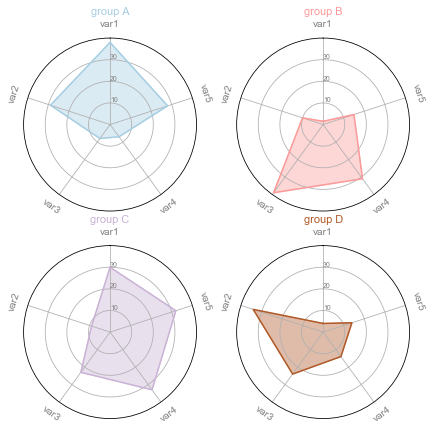

In [157]:
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

def make_spider(row,title,color):
    color=my_palette[row]
    categories=list(df)[1:]
    N=len(categories)
    angles=[n/float(N)*2*np.pi for n in range(N)]
    angles+=angles[:1]
    values=df.loc[row].drop('group').values.flatten().tolist()
    values+=values[:1]
    ax=plt.subplot(2,2,row+1, projection='polar')
    ax.set_theta_offset(np.pi/2.0)
    plt.xticks(angles[:-1], categories, color='gray')
    reset_xticklabels(ax,strict=True)
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30], ['10','20','30'],color='gray', size=7)
    ax.set_ylim(0,40)
    ax.plot(angles, values, color=color)
    ax.fill(angles, values, color=color, alpha=0.4)
    plt.title(title,color=color,size=11, y=1.1)
# 创建极坐标轴并进行范围设置
fig=plt.figure(figsize=(7,7), facecolor='w')

# Create a color palette:
# my_palette = plt.cm.get_cmap("Paired", len(df.index))
my_palette = plt.get_cmap('Paired')(np.linspace(0,1, 4))
for ind in range(0,len(df.index)):
    make_spider(ind,'group '+df['group'][ind], my_palette[ind])

plt.show()